In [229]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [250]:
# Load the Excel file
file_path = r'C:\Users\baran\OneDrive\Masaüstü\CS210-Project\Movie_data.xlsx'
data = pd.read_excel(file_path)

# Display the first few rows of the DataFrame to understand its structure
data.head(10)

,Movie,Year Watched,Genre,IMDB rank,Studio,Director,Relase year
0,Split,2021,Horror/Mystery,7.3,Blinding Edge Pictures,M. Night Shyamalan,2016
1,Focus,2021,Comedy/Crime,6.6,Warner Bros,Glenn Ficarra,2015
2,Dark Knight Rises,2021,Action/Thriller,9.0,Warner Bros,Christopher Nolan,2012
3,Rocketman,2021,Musical/Drama,7.3,Paramount Pictures,Dexter Fletcher,2019
4,The Shawshank Redemption,2021,Thriller/Crime,9.3,Warner Bros,Frank Darabont,1994
5,Star Wars 4,2021,Sci-fi/Fantasy,8.6,20th Century Studios,George Lucas,1977
6,Star Wars 5,2021,Sci-fi/Fantasy,8.7,20th Century Studios,Irvin Kershner,1980
7,Here Comes the Boom,2021,Comedy/Action,6.4,Sony Pictures,Frank Coraci,2012
8,Star Wars 6,2021,Sci-fi/Fantasy,8.3,20th Century Studios,Richard Marquand,1983
9,Sonic,2021,Comedy/Action,6.5,Paramount Pictures,Jeff Fowler,2020


In [231]:
# Check for missing values
print("Missing values in each column:\n", data.isnull().sum())

# Check data types
print("\nData types of each column:\n", data.dtypes)

Missing values in each column:
 Movie           0
Year Watched    0
Genre           0
IMDB rank       0
Studio          0
Director        0
Relase year     0
dtype: int64

Data types of each column:
 Movie            object
Year Watched      int64
Genre            object
IMDB rank       float64
Studio           object
Director         object
Relase year       int64
dtype: object


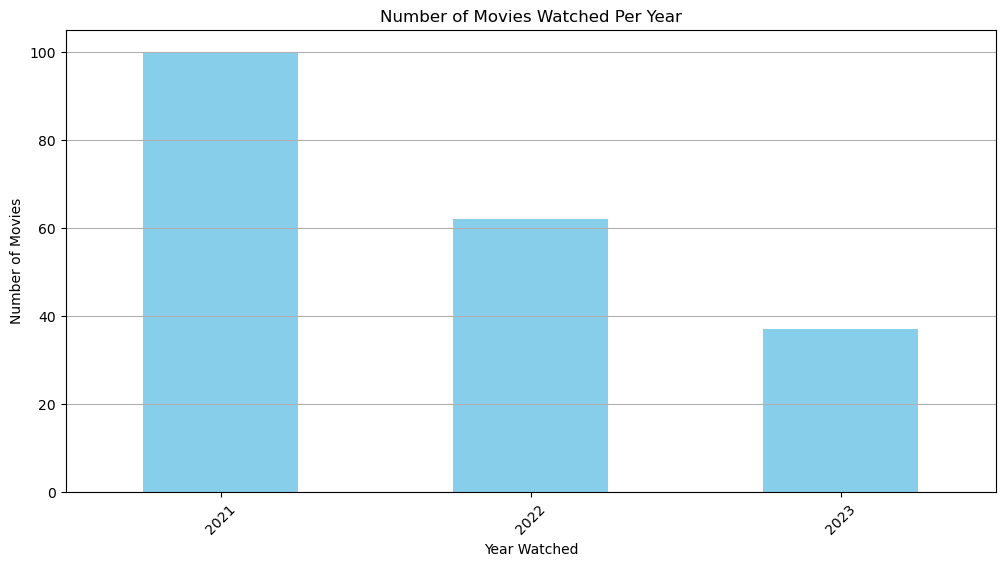

In [232]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data from the Excel file
file_path = r'C:\Users\baran\OneDrive\Masaüstü\CS210-Project\Movie_data.xlsx'
movie_data = pd.read_excel(file_path)

# Grouping the data by 'Year Watched' and counting the number of movies in each year
yearly_movie_count = movie_data['Year Watched'].value_counts().sort_index()

# Creating the plot
plt.figure(figsize=(12, 6))
yearly_movie_count.plot(kind='bar', color='skyblue')
plt.title('Number of Movies Watched Per Year')
plt.xlabel('Year Watched')
plt.ylabel('Number of Movies')
plt.grid(axis='y')
plt.xticks(rotation=45)
plt.show()


       Year Watched   IMDB rank  Relase year
count    199.000000  199.000000   199.000000
mean    2021.683417    7.129648  2007.417085
std        0.768888    0.932833    13.433033
min     2021.000000    4.400000  1955.000000
25%     2021.000000    6.500000  2001.500000
50%     2021.000000    7.100000  2010.000000
75%     2022.000000    7.800000  2018.000000
max     2023.000000    9.300000  2023.000000


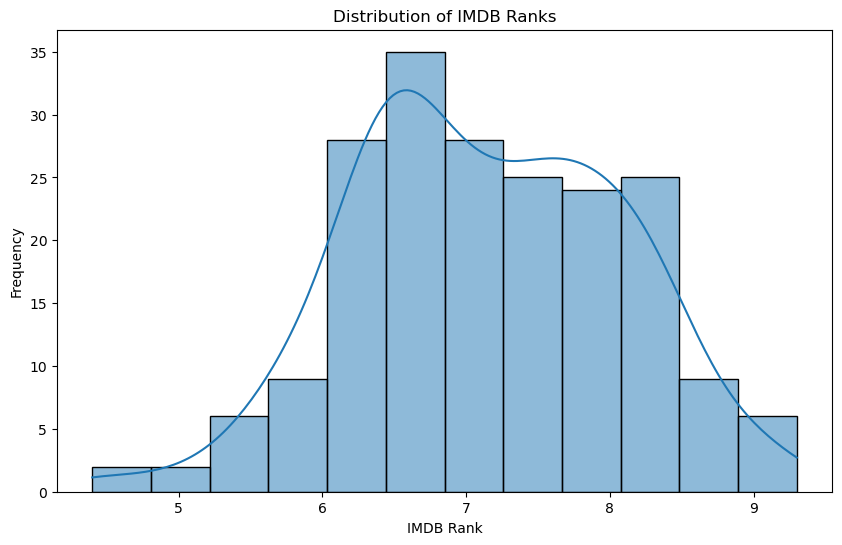

In [233]:
# Statistical Summary of Numerical Columns
print(data.describe())

# Distribution of IMDB ranks
plt.figure(figsize=(10, 6))
sns.histplot(data['IMDB rank'], kde=True)
plt.title('Distribution of IMDB Ranks')
plt.xlabel('IMDB Rank')
plt.ylabel('Frequency')
plt.show()


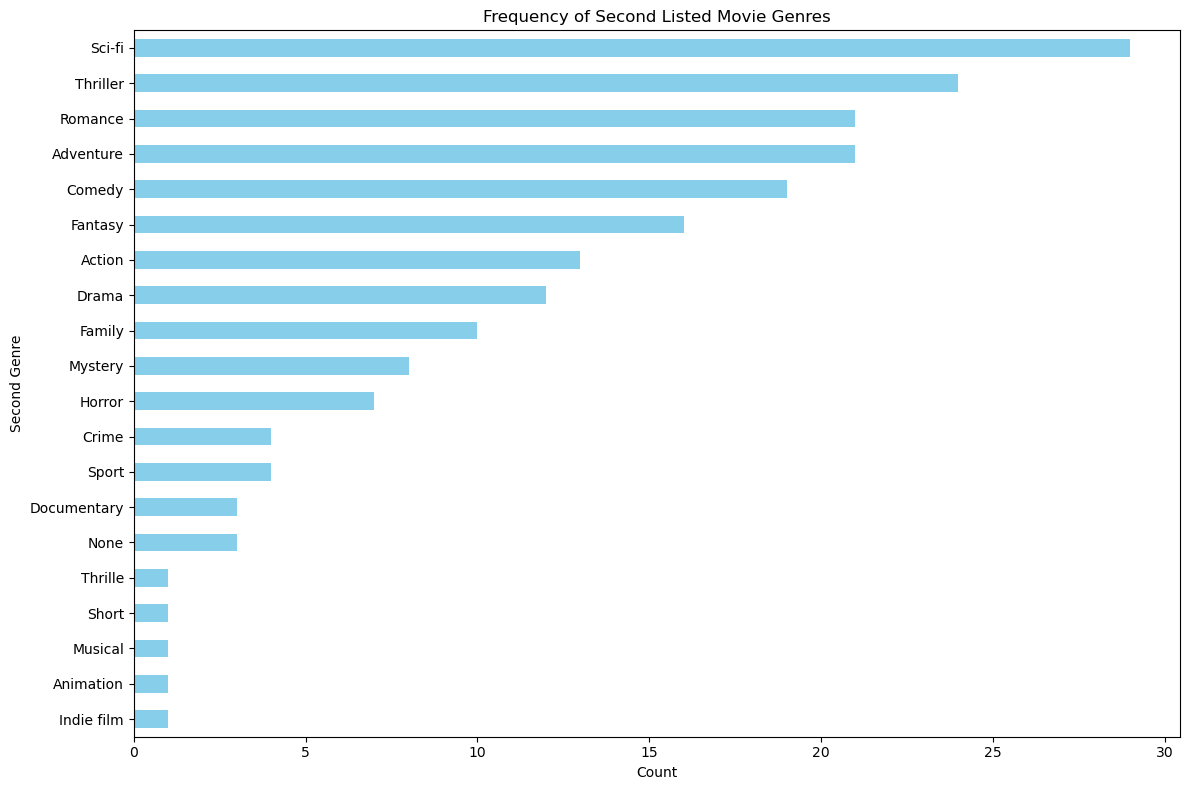

In [234]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data from the Excel file
movie_data = pd.read_excel(r'C:\Users\baran\OneDrive\Masaüstü\CS210-Project\Movie_data.xlsx') 
# Split the 'Genre' column and keep only the second genre (if it exists)
movie_data['Second Genre'] = movie_data['Genre'].apply(lambda x: x.split('/')[1].strip() if len(x.split('/')) > 1 else 'None')

# Count the frequency of each second genre
second_genre_counts = movie_data['Second Genre'].value_counts()

# Now plot the sorted values
plt.figure(figsize=(12, 8))
second_genre_counts.sort_values(ascending=True).plot(kind='barh', color='skyblue')
plt.title('Frequency of Second Listed Movie Genres')
plt.xlabel('Count')
plt.ylabel('Second Genre')
plt.tight_layout()  # This will adjust spacings to accommodate full labels
plt.show()

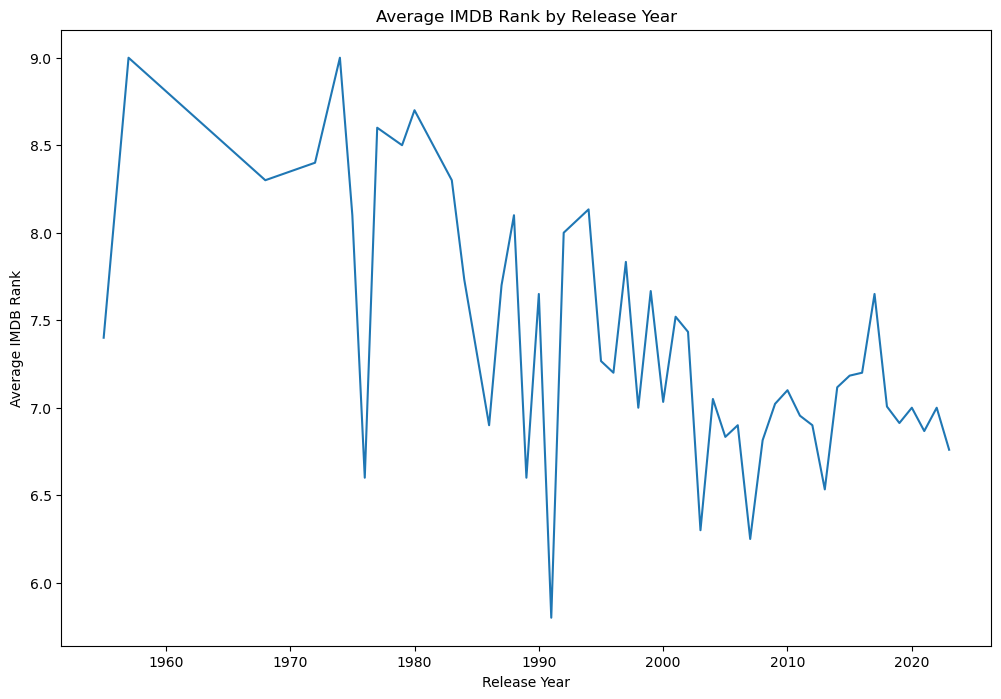

In [235]:
# Trends Over Time: Average IMDB Rank by Release Year
plt.figure(figsize=(12, 8))
data.groupby('Relase year')['IMDB rank'].mean().plot(kind='line')
plt.title('Average IMDB Rank by Release Year')
plt.xlabel('Release Year')
plt.ylabel('Average IMDB Rank')
plt.show()

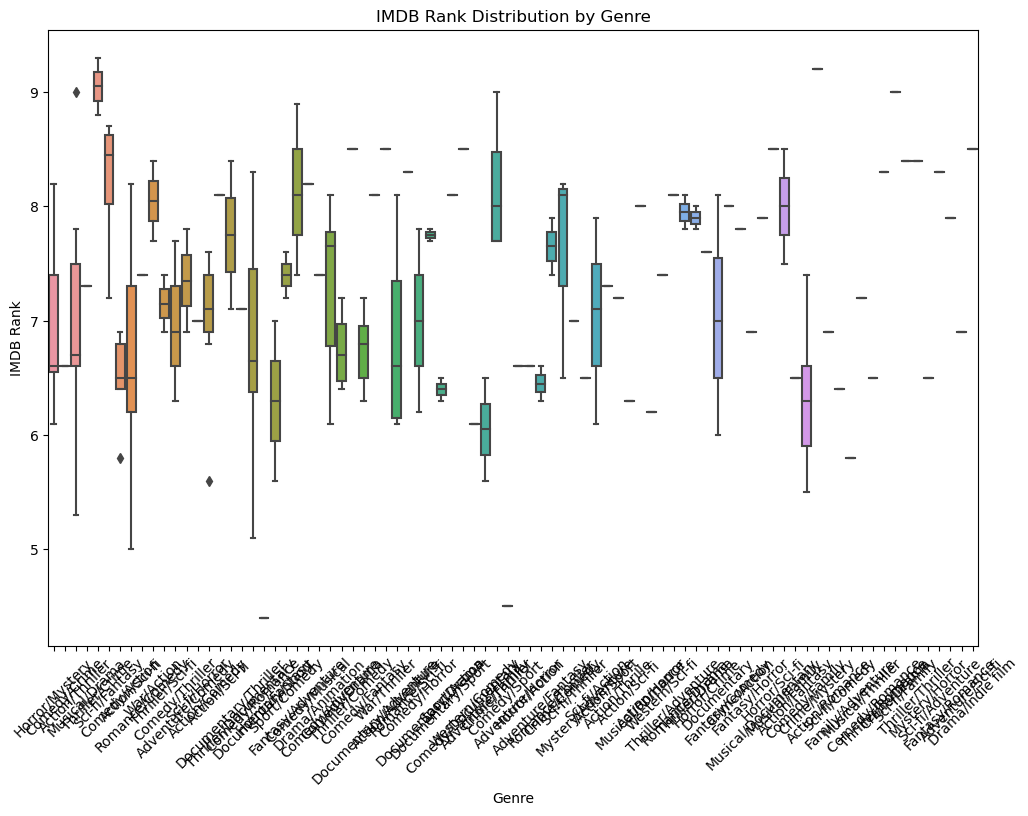

In [236]:
# Analysis by Genre
plt.figure(figsize=(12, 8))
sns.boxplot(x='Genre', y='IMDB rank', data=data)
plt.xticks(rotation=45)
plt.title('IMDB Rank Distribution by Genre')
plt.xlabel('Genre')
plt.ylabel('IMDB Rank')
plt.show()


In [237]:
# Analysis by Director
director_avg_rank = data.groupby('Director')['IMDB rank'].mean().sort_values(ascending=False)
print(director_avg_rank)

Director
Frank Darabont          9.3
Francis Ford Coppola    9.1
Sidney Lumet            9.0
Peter Jackson           8.9
Irvin Kershner          8.7
                       ... 
Mark Steven Johnson     5.3
Mariano Laurenti        5.1
Ben Wheatley            5.0
Malcolm D. Lee          4.5
Jason Russell           4.4
Name: IMDB rank, Length: 162, dtype: float64


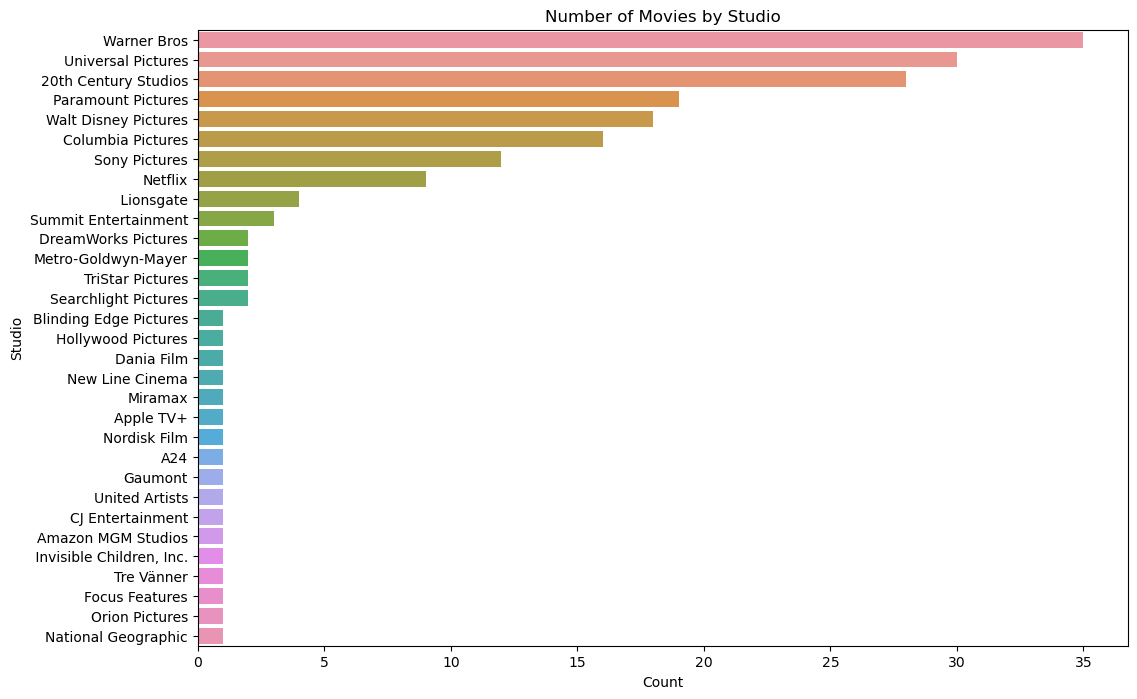

In [238]:
# Analysis by Studio
plt.figure(figsize=(12, 8))
sns.countplot(y='Studio', data=data, order = data['Studio'].value_counts().index)
plt.title('Number of Movies by Studio')
plt.xlabel('Count')
plt.ylabel('Studio')
plt.show()

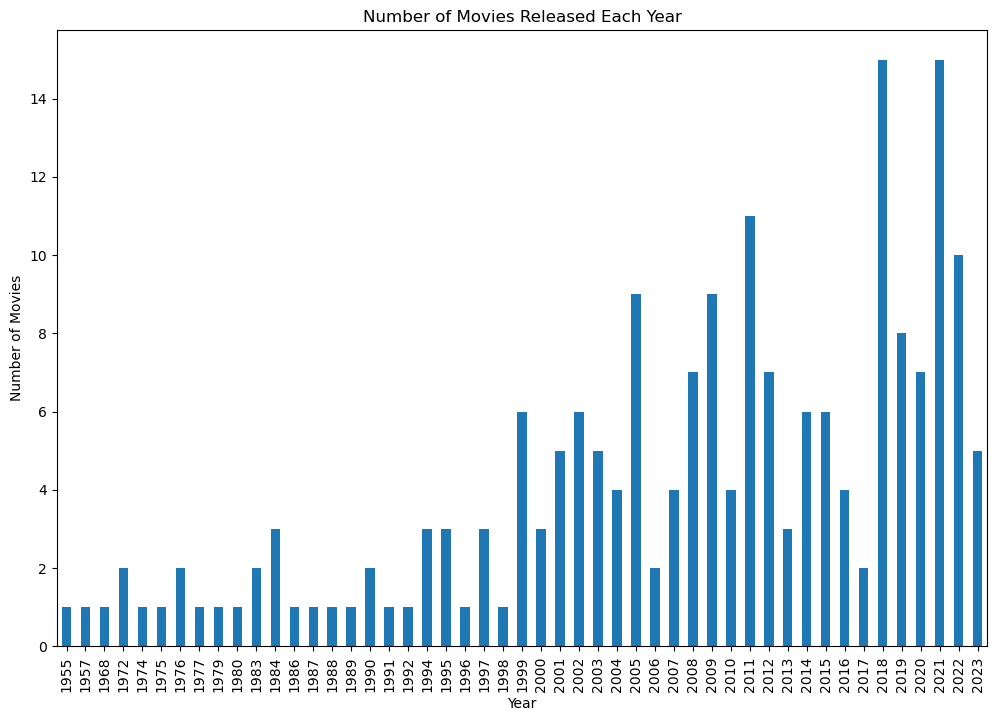

In [239]:
# Year-wise Movie Count
plt.figure(figsize=(12, 8))
data['Relase year'].value_counts().sort_index().plot(kind='bar')
plt.title('Number of Movies Released Each Year')
plt.xlabel('Year')
plt.ylabel('Number of Movies')
plt.show()

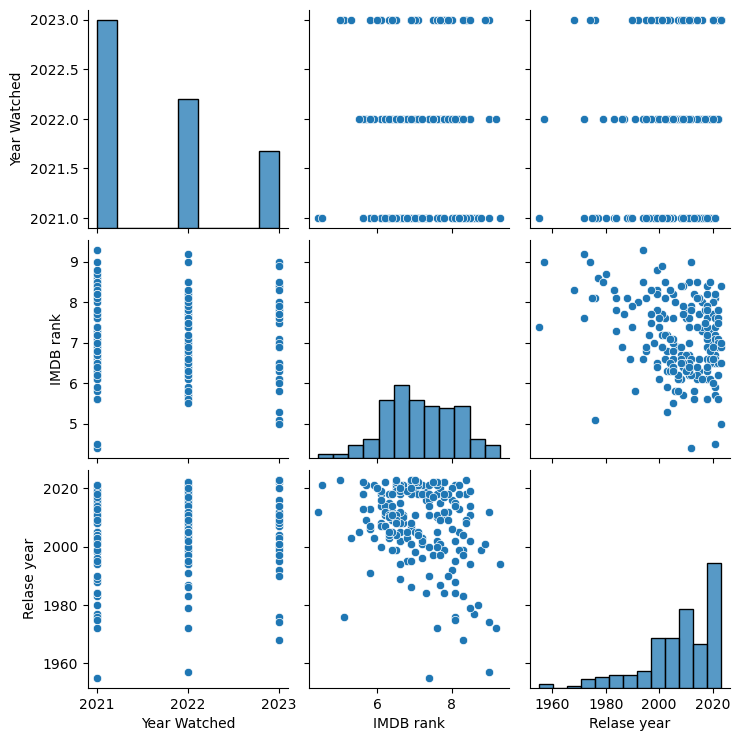

In [240]:
import warnings
warnings.simplefilter("ignore", UserWarning)

# Now you can include all your plotting code, and the filter will be applied to all of it
sns.pairplot(data.select_dtypes(include=['float64', 'int64']))
plt.show()


In [241]:
# Example: Assume any movie with an IMDB rank above 7.0 is liked
data['Like'] = data['IMDB rank'].apply(lambda x: 1 if x > 7.0 else 0)

# Now print the first few rows of the DataFrame to see the 'Like' column
print(data.head())

                      Movie  Year Watched            Genre  IMDB rank  \
0                     Split          2021   Horror/Mystery        7.3   
1                     Focus          2021     Comedy/Crime        6.6   
2         Dark Knight Rises          2021  Action/Thriller        9.0   
3                 Rocketman          2021    Musical/Drama        7.3   
4  The Shawshank Redemption          2021   Thriller/Crime        9.3   

                   Studio            Director  Relase year  Like  
0  Blinding Edge Pictures  M. Night Shyamalan         2016     1  
1             Warner Bros       Glenn Ficarra         2015     0  
2             Warner Bros   Christopher Nolan         2012     1  
3      Paramount Pictures     Dexter Fletcher         2019     1  
4             Warner Bros      Frank Darabont         1994     1  


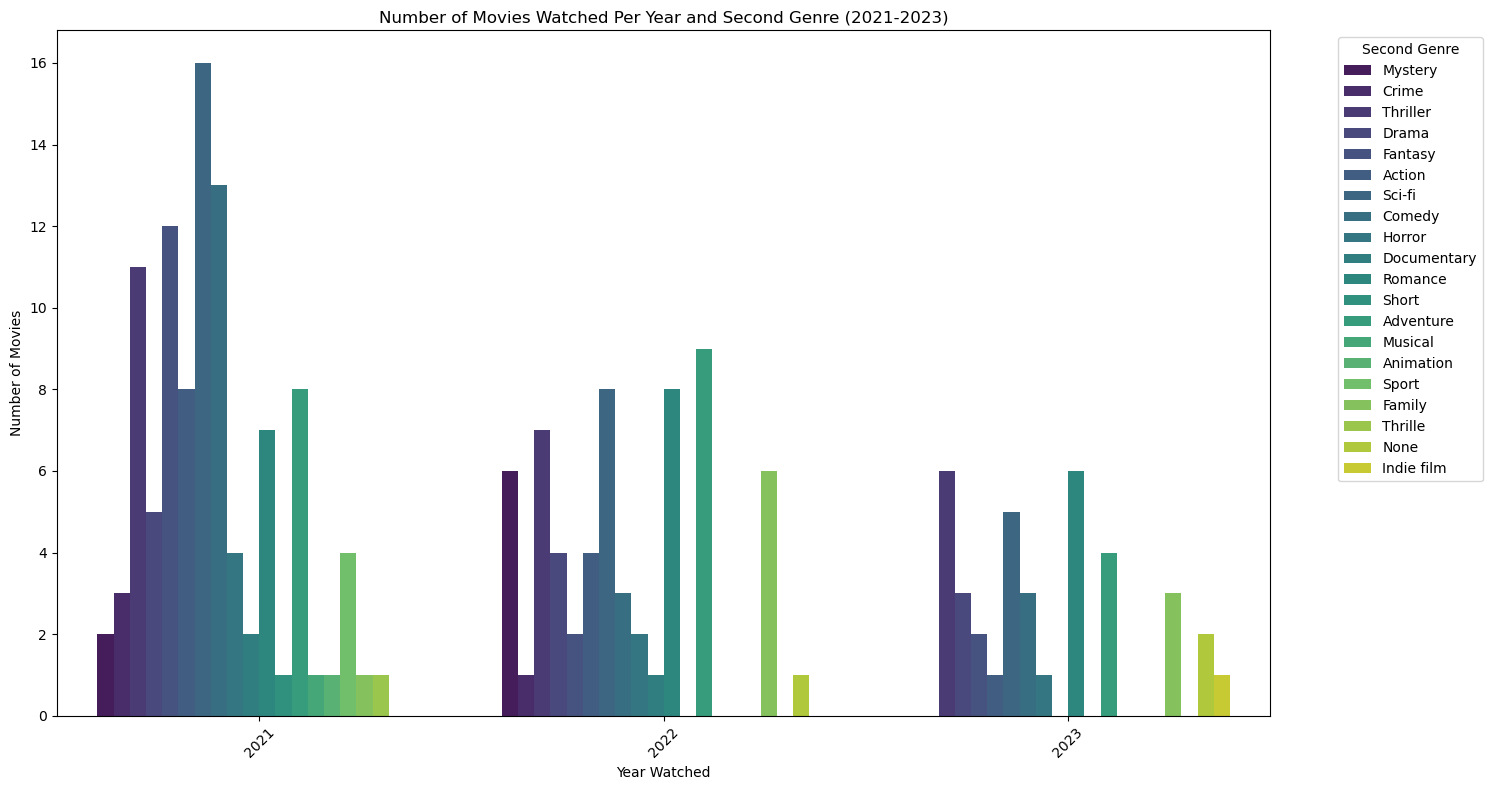

In [245]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the movie data
data = pd.read_excel(r'C:\Users\baran\OneDrive\Masaüstü\CS210-Project\Movie_data.xlsx')

# Standardize the genre order
data['Genre'] = data['Genre'].apply(lambda x: '/'.join(sorted(x.split('/'))))

# Modify the 'Genre' column to keep only the second genre (if it exists)
movie_data['Second Genre'] = movie_data['Genre'].apply(lambda x: x.split('/')[1].strip() if len(x.split('/')) > 1 else 'None')

# Filter the data for the years 2021, 2022, and 2023
filtered_data = movie_data[movie_data['Year Watched'].isin([2021, 2022, 2023])]

# Create a countplot to visualize the number of movies watched per year and second genre
plt.figure(figsize=(15, 8))
sns.countplot(data=filtered_data, x='Year Watched', hue='Second Genre', palette='viridis')
plt.title('Number of Movies Watched Per Year and Second Genre (2021-2023)')
plt.xlabel('Year Watched')
plt.ylabel('Number of Movies')
plt.xticks(rotation=45)
plt.legend(title='Second Genre', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [252]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import numpy as np

# Load the movie data (assuming the same structure as before)
data = pd.read_excel(r'C:\Users\baran\OneDrive\Masaüstü\CS210-Project\Movie_data.xlsx')

# Standardize the genre order and keep only the first genre
data['Standardized First Genre'] = data['Genre'].apply(lambda x: sorted(x.split('/'))[0])

# Selecting features and target for the model
features = data[['Standardized First Genre', 'Relase year']]
target = data['IMDB rank']

# One-hot encoding for the categorical 'Standardized First Genre' feature
preprocessor = ColumnTransformer(
    transformers=[
        ('genre', OneHotEncoder(), ['Standardized First Genre'])
    ], remainder='passthrough'
)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=0)

# Create a linear regression model
model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('regressor', LinearRegression())])

# Train the model
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

rmse

0.7010433877391228

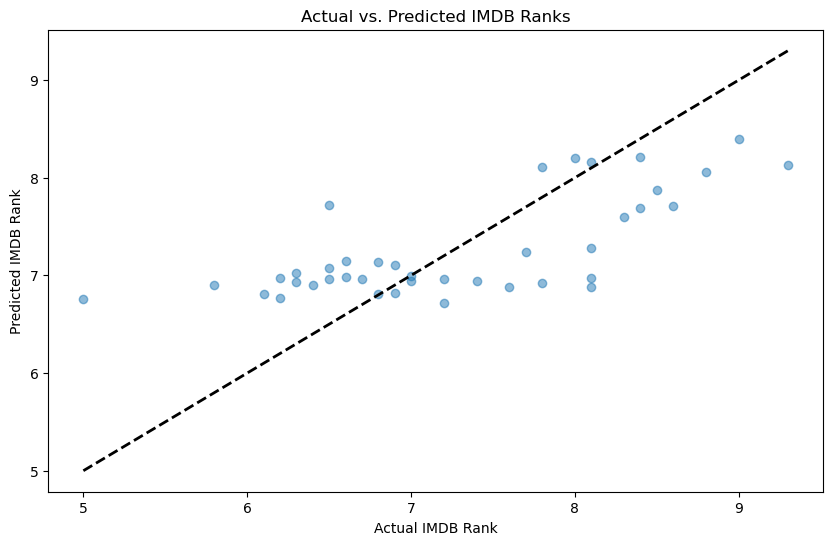

In [253]:
import matplotlib.pyplot as plt

# Scatter plot of actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)  # Diagonal line for reference
plt.title('Actual vs. Predicted IMDB Ranks')
plt.xlabel('Actual IMDB Rank')
plt.ylabel('Predicted IMDB Rank')
plt.show()
